In [ ]:
# Program 1

# Program to implement the Candidate Elimination Algorithm

import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv("Training.csv")
print("Dataset:\n", data)

# Extract features and target
concepts = np.array(data.iloc[:, :-1])
target = np.array(data.iloc[:, -1])

def candidate_elimination(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]

    print("\nInitialization of specific_h and general_h:")
    print("Specific_h:", specific_h)
    print("General_h:", general_h)

    for i, example in enumerate(concepts):
        print(f"\nStep {i + 1}:")
        if target[i] == "Yes":
            for j in range(len(specific_h)):
                if example[j] != specific_h[j]:
                    specific_h[j] = "?"
                    general_h[j][j] = "?"
        else:  # target[i] == "No"
            for j in range(len(specific_h)):
                general_h[j][j] = specific_h[j] if example[j] != specific_h[j] else "?"

        print("Specific_h:", specific_h)
        print("General_h:", general_h)

    general_h = [g for g in general_h if any(attr != "?" for attr in g)]
    return specific_h, general_h

# Execute the algorithm
specific_h, general_h = candidate_elimination(concepts, target)
print("\nFinal Specific_h:", specific_h)
print("Final General_h:", general_h)


Dataset:
       Sky Airtemp Humidity    Wind Water Forecast WaterSport
0   Sunny    Warm   Normal  Strong  Warm     Same        Yes
1   Sunny    Warm     High  Strong  Warm     Same        Yes
2  Cloudy    Cold     High  Strong  Warm   Change         No
3   Sunny    Warm     High  Strong  Cool   Change        Yes

Initialization of specific_h and general_h:
Specific_h: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General_h: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 1:
Specific_h: ['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
General_h: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2:
Specific_h: ['Sunny' 'Warm' '?' 'Strong' 'Warm' 'Same']
General_h: [['?', '?', '?', '?', '?'

In [12]:
# Program 2
# Program to find a path in a grid using BFS

def find_path(grid, start, goal):
    rows = len(grid)
    cols = len(grid[0])
    queue = [(start, [start])]
    visited = {start}

    # Right, Left, Down, Up
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    while queue:
        (x, y), path = queue.pop(0)

        if (x, y) == goal:
            return path

        for dx, dy in directions:
            new_x = x + dx
            new_y = y + dy
            new_pos = (new_x, new_y)

            if (0 <= new_x < rows and
                0 <= new_y < cols and
                grid[new_x][new_y] == 0 and
                new_pos not in visited):

                queue.append((new_pos, path + [new_pos]))
                visited.add(new_pos)

    return None


# Example grid and usage
grid = [
    [0, 1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0, 1],
    [0, 1, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [1, 0, 1, 1, 0, 0]
]

start = (0, 0)
goal = (5, 5)

path = find_path(grid, start, goal)
print("Path:", path)

Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5)]


Slope (m): 0.9987762237762237
Intercept (b): 0.09545454545454746


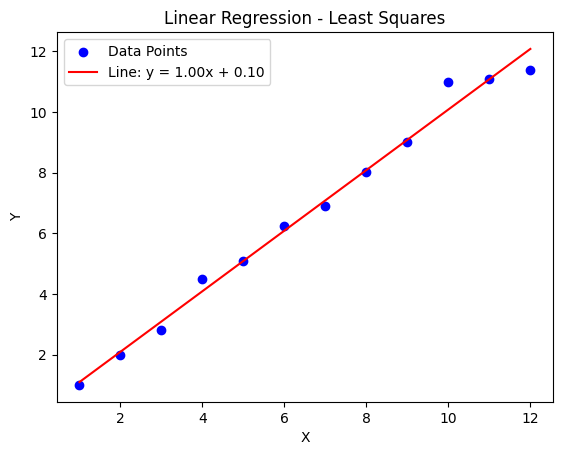

In [13]:
# Program 3

import numpy as np
import matplotlib.pyplot as plt

# Simple function to do linear regression
def linear_regression(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    num = np.sum((x - mean_x) * (y - mean_y))
    den = np.sum((x - mean_x) ** 2)

    m = num / den
    b = mean_y - m * mean_x

    return m, b

# Predict y from x using the formula y = mx + b
def predict(x, m, b):
    return m * x + b

# Example data
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
y = np.array([1,2,2.8,4.5,5.1,6.23,6.9,8.01,9.01,11,11.1,11.4])

# Get the best-fit line
m, b = linear_regression(x, y)

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Get predicted y values
y_pred = predict(x, m, b)

# Plot
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label=f'Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression - Least Squares')
plt.legend()
plt.show()

In [3]:
# Program 6

import numpy as np

def step_function(x): return np.where(x >= 0, 1, 0)

class Perceptron:
    def __init__(self, size, lr=0.1, epochs=1000):
        self.w = np.zeros(size)
        self.b = 0
        self.lr = lr
        self.epochs = epochs
    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, t in zip(X, y):
                pred = step_function(np.dot(xi, self.w) + self.b)
                e = t - pred
                self.w += self.lr * e * xi
                self.b += self.lr * e
    def predict(self, X):
        return step_function(np.dot(X, self.w) + self.b)
    def get_params(self): return self.w, self.b

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])
p = Perceptron(2, 0.1, 1000)
p.train(X, y)
print("Predictions:", p.predict(X))
w, b = p.get_params()
print("Weights:", w)
print("Bias:", b)

Predictions: [1 1 0 0]
Weights: [-0.1  0. ]
Bias: 0.0


C:\Users\nanda\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'EM Algorithm')

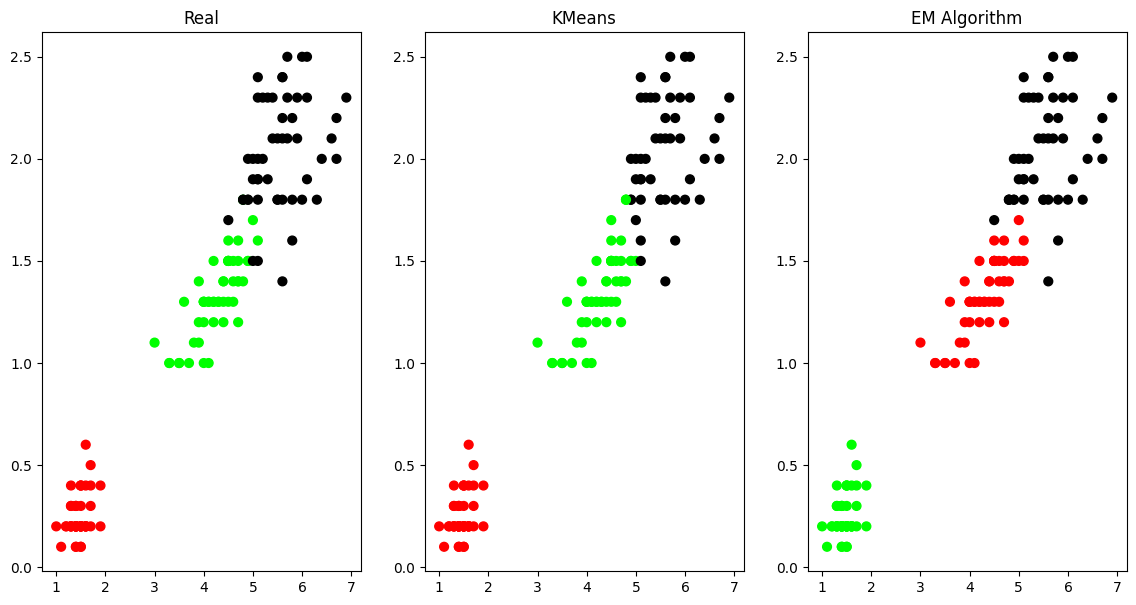

In [4]:
# Program 9


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data[:, 2:]  # Petal Length, Petal Width
y = iris.target
colormap = np.array(['red', 'lime', 'black'])

plt.figure(figsize=(14, 7))

# Real plot
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)
plt.title('Real')

# KMeans plot (with label reordering to match original)
plt.subplot(1, 3, 2)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
predY = np.choose(kmeans.labels_, [1, 0, 2]).astype(np.int64)  # Adjusted to match original
plt.scatter(X[:, 0], X[:, 1], c=colormap[predY], s=40)
plt.title('KMeans')

# GMM plot
plt.subplot(1, 3, 3)
xs = StandardScaler().fit_transform(X)
gmm = GaussianMixture(n_components=3, random_state=0).fit(xs)
plt.scatter(X[:, 0], X[:, 1], c=colormap[gmm.predict(xs)], s=40)
plt.title('EM Algorithm')